Plotando o gráfico

Rodando o K-Means com K=4...

 Análise 

    Cluster 0 (Total de 877 acidentes)       

Distribuição de Gênero:
Genero
Masculino    86.8%
Feminino     13.2%
Name: proportion, dtype: object

Distribuição do Período do Dia:
Periodo_do_Dia
Manhã        70.8%
Madrugada    29.2%
Name: proportion, dtype: object

Distribuição do Tipo de Usuário da Via:
Usuario_Via
Ciclista    100.0%
Name: proportion, dtype: object

    Cluster 1 (Total de 8513 acidentes)       

Distribuição de Gênero:
Genero
Masculino    100.0%
Name: proportion, dtype: object

Distribuição do Período do Dia:
Periodo_do_Dia
Manhã        85.7%
Madrugada    14.3%
Name: proportion, dtype: object

Distribuição do Tipo de Usuário da Via:
Usuario_Via
Motorista                       47.8%
Motociclista                    27.0%
Passageiro                      13.4%
Pedestre                        11.3%
Motorcycle pillion passenger     0.4%
Other/-9                         0.1%
Name: proportion, dtype: object

    C

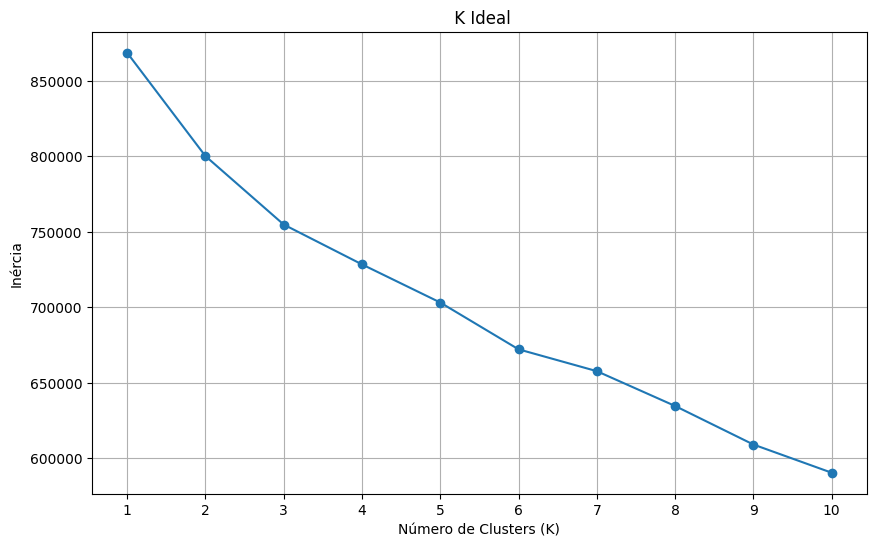

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


try:
    df = pd.read_csv('datasetML.csv')
except Exception as e:
    print(f"Erro ao ler o CSV, tentando com outro encoding: {e}")
    df = pd.read_csv('datasetML.csv', encoding='latin1')

# características de um acidente
features_for_clustering = [
    'Estado', 'Faixa_Etaria', 'Genero', 'Periodo_do_Dia',
    'Usuario_Via', 'Dia_da_Semana', 'Tipo_Acidente'
]
df_cluster = df[features_for_clustering].dropna().copy()

df_encoded = pd.get_dummies(df_cluster)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

print("Plotando o gráfico")
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# gráfico do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title(' K Ideal')
plt.xticks(K_range)
plt.grid(True)
plt.savefig('metodo_cotovelo.png')

K_ideal = 4

print(f"\nRodando o K-Means com K={K_ideal}...")
kmeans = KMeans(n_clusters=K_ideal, random_state=42, n_init=10)
kmeans.fit(df_scaled)

df_cluster['Cluster'] = kmeans.labels_


print("\n Análise ")

for i in range(K_ideal):
    cluster_size = len(df_cluster[df_cluster['Cluster'] == i])
    print(f"\n    Cluster {i} (Total de {cluster_size} acidentes)       ")

    cluster_data = df_cluster[df_cluster['Cluster'] == i]

    # distribuição percentual
    print("\nDistribuição de Gênero:")
    print((cluster_data['Genero'].value_counts(normalize=True) * 100).round(1).astype(str) + '%')

    print("\nDistribuição do Período do Dia:")
    print((cluster_data['Periodo_do_Dia'].value_counts(normalize=True) * 100).round(1).astype(str) + '%')

    print("\nDistribuição do Tipo de Usuário da Via:")
    print((cluster_data['Usuario_Via'].value_counts(normalize=True) * 100).round(1).astype(str) + '%')


df_cluster.to_csv('dataset_com_clusters.csv', index=False)
print("\nArquivo 'dataset_com_clusters.csv' foi gerado com os resultados.")